In [187]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct
from matplotlib.patches import Circle, PathPatch


V = np.genfromtxt("Meshdata/VerticesRing8.txt")
T = np.genfromtxt("Meshdata/FacesRing8.txt")

n_v = len(V)
n_t = len(T)

#for i in range(0, n_t , 1):
#        for j in range( 0, 3 , 1):
#                k = int(T[i][j])
#                l = int(T[i][(j+1)%3])
#                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
#for i in range(0,n_v,1):
#    plt.scatter(V[i][0],V[i][1], color='r', marker='o')
#plt.show()



Sol = np.genfromtxt("Solutions/PoissonGaussSolutionRing8.txt")

In [188]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap='plasma',alpha=0.5)
    plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)



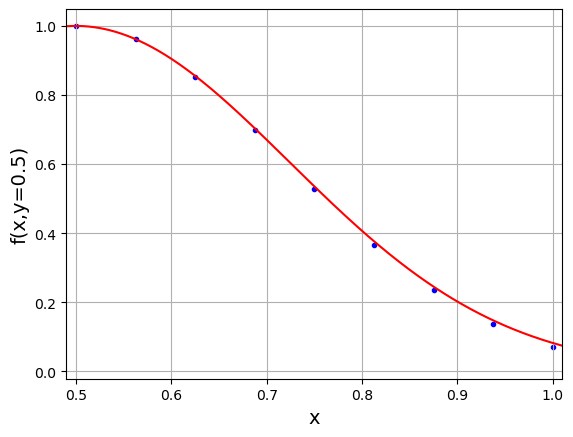

In [189]:
RadialValues = []
for i in range(0,len(V)):
    if( V[i][1]==0.5 and V[i][0]>=0.5 ):
        RadialValues.append( (V[i][0] , Sol[i]) )

X = np.linspace(0.4,1.1,1000)
Y = np.array(RadialValues)
constant = np.min(Y[::,1::])
constant2 = 1 - np.max(Y[::,1::])
constant3 = math.exp(-2.5)-constant
plt.grid()
#plt.ylim(-7.1,5.5)
for i in range(0, len(RadialValues)):
    plt.scatter( RadialValues[i][0], RadialValues[i][1]+constant2, c='b', marker='.')
plt.plot(X, np.exp(-10.*(X-0.5)**2), c='r')
plt.xlabel('x',fontsize=14)
plt.xlim(0.49,1.01)
plt.ylabel(r'f(x,y=0.5)',fontsize=14)
plt.show()

Val = np.array(RadialValues)

In [190]:
from scipy.optimize import curve_fit

def FuncModel(x,b):
    return np.exp(-b*x**2)

def Model2(x,a,b,c):
    return a*np.exp(-b*x**2) + c

def Model3(x,a,b):
    return a*np.exp(-b*x**2)

def Model4(x,a,b,n):
    return a*np.exp(-b*x**n)

xdata = []
ydata = []
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    xdata.append(r)
    ydata.append(Sol[i]+constant2)
    

popt, pcov = curve_fit( FuncModel , xdata , ydata )
popt2, pcov2 = curve_fit( Model2, xdata , ydata )
popt3, pcov3 = curve_fit( Model3, xdata , ydata )
popt4, pcov4 = curve_fit( Model4 , xdata , ydata )
print(popt)
print(pcov)
print(popt2)
print(pcov2)
print(popt3)
print(pcov3)
print(popt4)
print(pcov4)

[10.30820154]
[[2.80927252e-05]]
[ 1.01005072 10.08958298 -0.01017381]
[[ 3.45318379e-09 -5.54442413e-08 -2.92760518e-09]
 [-5.54442413e-08  3.38329468e-06  1.19080706e-07]
 [-2.92760518e-09  1.19080706e-07  4.72589377e-09]]
[ 1.00379207 10.35145547]
[[1.79361916e-07 2.05173754e-06]
 [2.05173754e-06 4.40592301e-05]]
[ 0.99647405 10.67092374  2.03426877]
[[ 1.46255493e-07 -3.76837315e-06 -4.60036352e-07]
 [-3.76837315e-06  2.10809072e-04  2.08075677e-05]
 [-4.60036352e-07  2.08075677e-05  2.19392586e-06]]


In [191]:
np.sqrt(np.diag(pcov2))

array([5.87637966e-05, 1.83937345e-03, 6.87451363e-05])

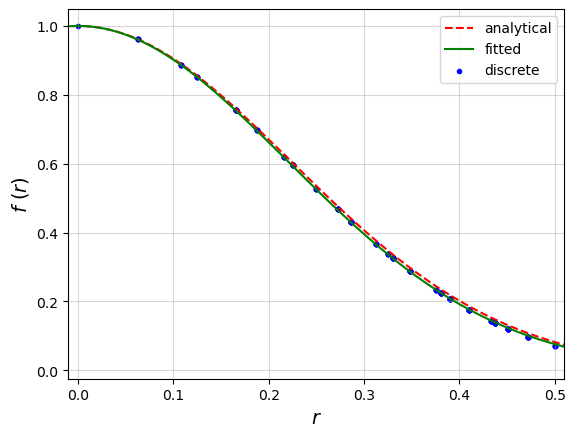

In [192]:
X = np.linspace(-0.1,0.6,100)
plt.grid(alpha=0.5)
plt.plot(X, np.exp(-10.*(X)**2), c='r',linestyle='dashed',label='analytical')
plt.plot(X, FuncModel(X,popt),color='g',label='fitted')
#plt.plot(X, Model2(X,popt2[0],popt2[1],popt2[2]),color='y',label='Model2')
plt.scatter(xdata,ydata,marker='.',color='b',label='discrete')
plt.xlabel('$r$',fontsize=14)
plt.xlim(-0.01,0.51)
plt.ylabel('$f\ (r)$',fontsize=14)
plt.legend()
plt.show()

Text(0, 0.5, 'y')

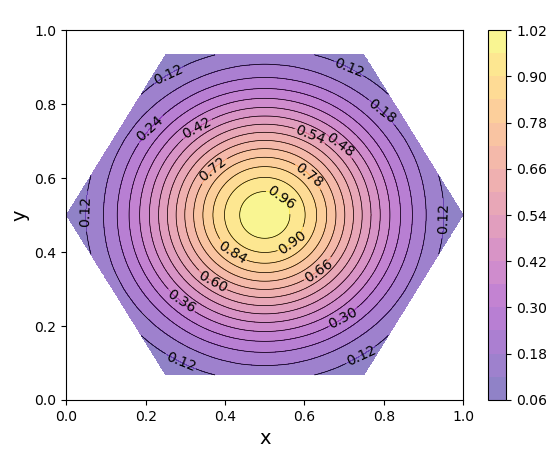

In [193]:

InterpolationPlot( V , Sol +constant2, " ", T)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)

In [194]:

R = []
Y = []
for i in range(0,len(V)):
    R.append( ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2) )
    Y.append( (math.log(Sol[i]+constant2)) )
res = scipy.stats.linregress( R, Y)

Text(0, 0.5, '$\\sqrt{|\\,\\mathrm{lg}\\left(f\\,(r)\\right)\\,|}$')

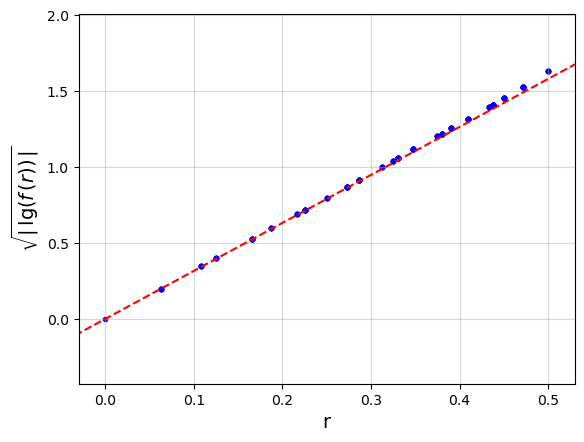

In [195]:
def InterpolationPlot2( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap='jet_r',alpha=0.5)
    #plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    #plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    #for i in range(0, len(Triangulation) , 1):
    #    for j in range( 0, 3 , 1):
    #            k = int(Triangulation[i][j])
    #            l = int(Triangulation[i][(j+1)%3])
    #            plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)




def AnaPot( x,y ):
    r = ((x-0.5)**2 + (y-0.5)**2)**0.5
    Val = math.exp(-10.*r**2)
    return Val

Error = []
for i in range(0,len(Sol)):
    Error.append((Sol[i]+constant2-AnaPot(V[i][0],V[i][1]))/AnaPot(V[i][0],V[i][1]))

plt.grid(alpha=0.5)
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter(r,math.sqrt(abs(math.log(Sol[i]+constant2))),color='b',marker='.')
plt.plot(X, math.sqrt(10)*X, color='r', linestyle='--' )
#plt.plot(X, res.slope*X+res.intercept, color='g')
plt.xlim(-0.03,0.53)
plt.xlabel('r', fontsize=14)
plt.ylabel(r'$\sqrt{|\,\mathrm{lg}\left(f\,(r)\right)\,|}$', fontsize=14)

Text(0, 0.5, 'y')

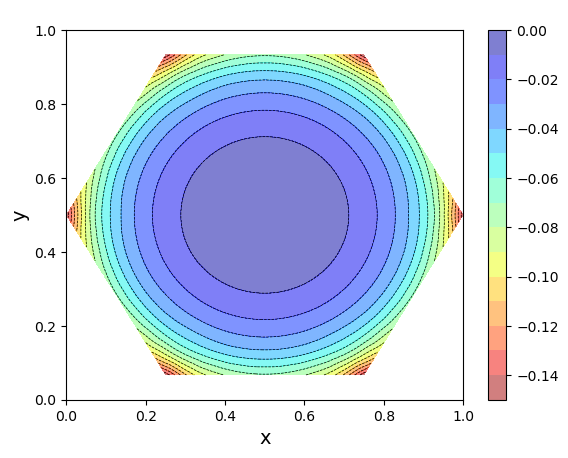

In [196]:
InterpolationPlot2(V , Error , " ", T)
plt.xlabel('x',fontsize=14)
plt.ylabel('y', fontsize=14)

(-0.01, 0.51)

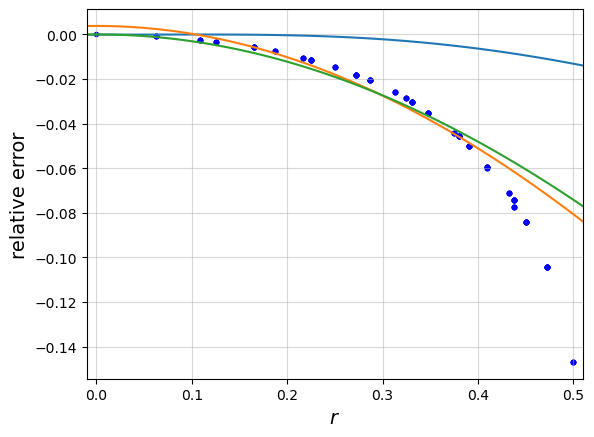

In [197]:
plt.grid(alpha=0.5)
for i in range(0,len(V)):
    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
    plt.scatter( r , Error[i] , color='b', marker='.')

plt.plot(X, popt2[0]*np.exp(-(popt2[1]-10.)*X**2)+popt2[2]*np.exp(-10.*X**2)-1. )
plt.plot(X, popt3[0]*np.exp(-(popt3[1]-10.)*X**2)+-1. )
plt.plot(X, np.exp(-(popt-10.)*X**2)-1.)
    
plt.xlabel(r'$r$',fontsize=14)
plt.ylabel('relative error', fontsize=14)
plt.xlim(-0.01,0.51)


In [198]:
res.slope

-10.508476354420566

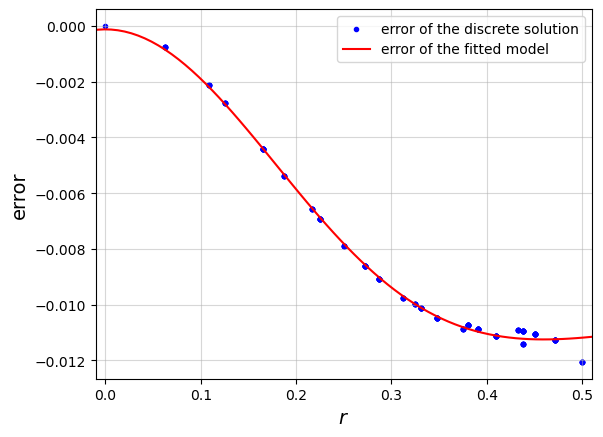

In [202]:
plt.grid(alpha=0.5)
AnaSol = np.exp(-10.*np.array(xdata)**2)
plt.scatter(xdata,ydata-AnaSol,marker='.',color='b',label='error of the discrete solution')
plt.plot(X, Model2(X,popt2[0],popt2[1],popt2[2])-np.exp(-10.*X**2),color='r',label='error of the fitted model')
plt.xlim(-0.01,0.51)
plt.xlabel(r'$r$',fontsize=14)
plt.ylabel('error', fontsize=14)
plt.legend()

In [200]:
#plt.grid(alpha=0.5)
#for i in range(1,len(V)):
#    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
#    plt.scatter( r ,math.log(abs(Error[i])) , color='b', marker='.')
#    
#plt.xlabel(r'$|\mathbf{r}_0 - \mathbf{r}|$',fontsize=14)
#plt.ylabel('relative error', fontsize=14)
#plt.show() 

#plt.grid(alpha=0.5)
#for i in range(1,len(V)):
#    r = ((V[i][0]-0.5)**2 + (V[i][1]-0.5)**2)**0.5
#    plt.scatter( r ,math.sqrt(abs(math.log(abs(Error[i])))) , color='b', marker='.')
    
#plt.xlabel(r'$|\mathbf{r}_0 - \mathbf{r}|$',fontsize=14)
#plt.ylabel('relative error', fontsize=14)